In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/AN2DL/Homework

Mounted at /gdrive
/gdrive/My Drive/AN2DL/Homework


In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import random

In [15]:
path = "training_set.npz"

with np.load(path) as data:
  samples = data['images']
  labels = data['labels']

label_values = [
  "Basophil", "Eosinophil", "Erythroblast",
  "Immature granulocytes", "Lymphocyte", "Monocyte",
  "Neutrophil", "Platelet"]


In [16]:
print(samples.shape)
print(labels.shape)


(13759, 96, 96, 3)
(13759, 1)


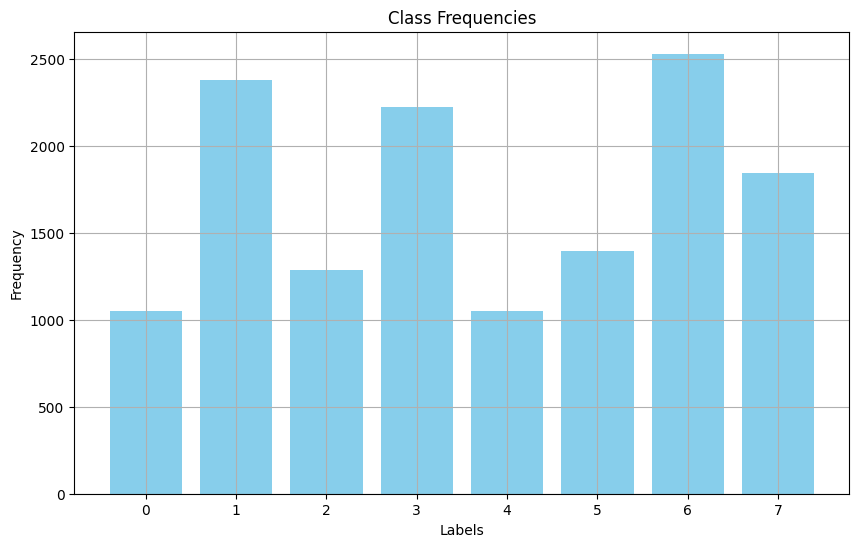

In [17]:
unique_labels, orig_counts = np.unique(labels, return_counts=True)

plt.figure(figsize=(10, 6))
plt.bar(unique_labels, orig_counts, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Class Frequencies')
plt.xticks(unique_labels)
plt.grid(True)
plt.show()

Normalize images samples and compute a thresholding filter upon colors. Compare original with filtered image

<ipython-input-18-c63a9ef8c0d8>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[i//cols, 0].set_title(f'Label: {label_values[int(labels[idx])]}', fontsize=10)


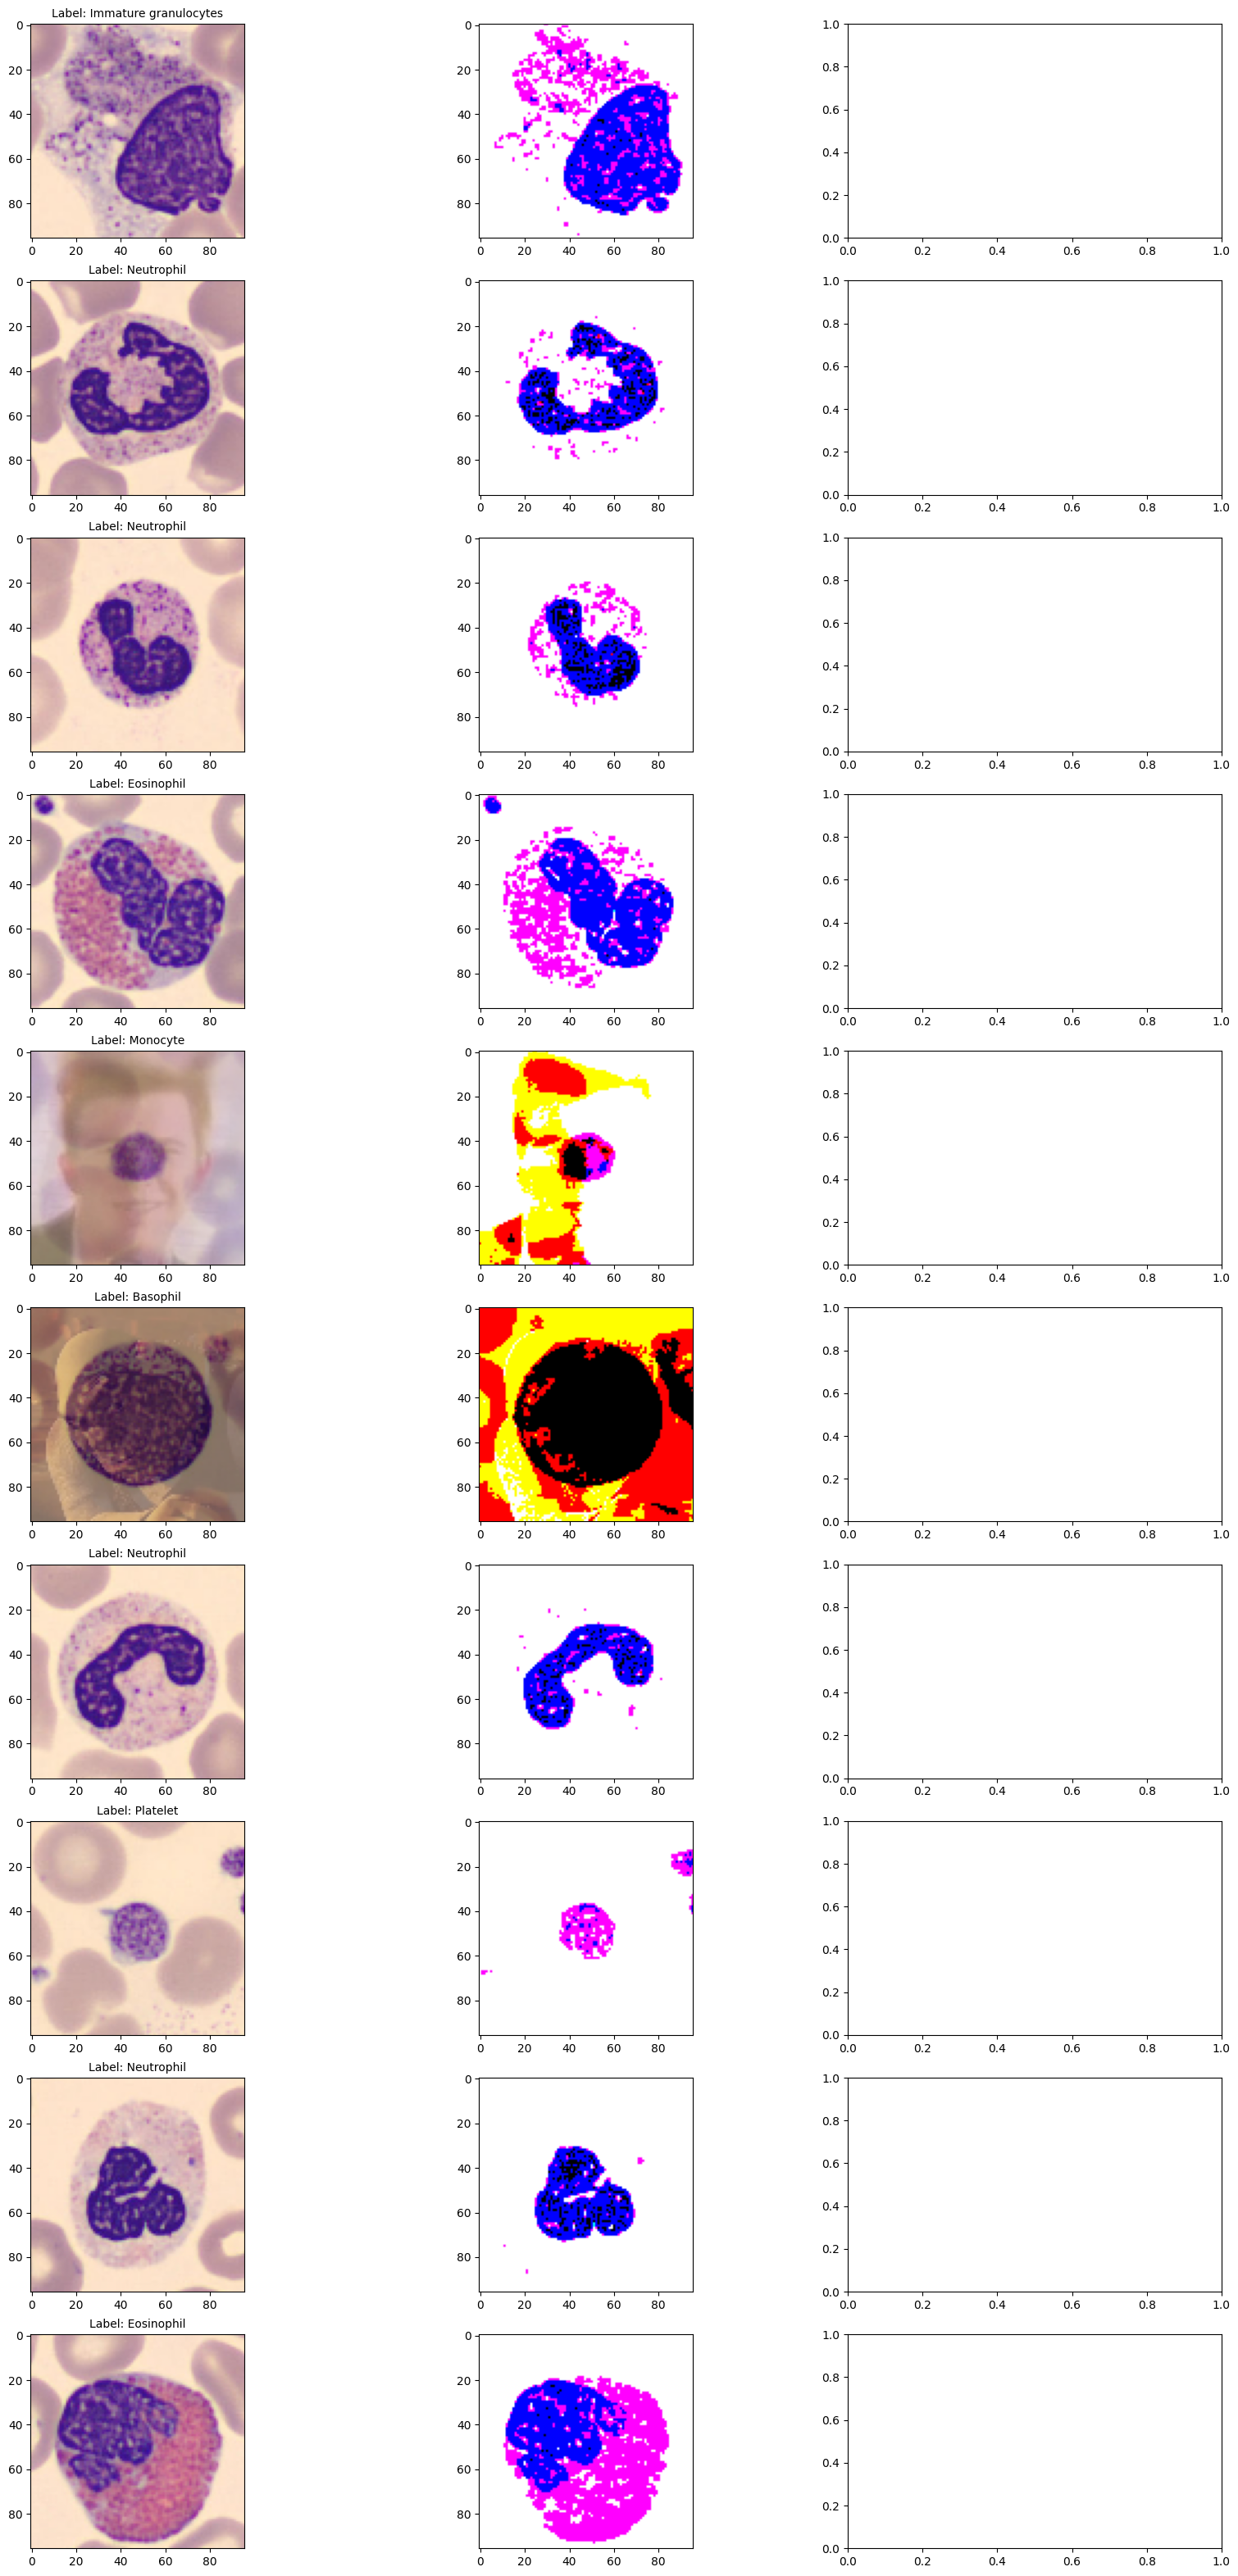

In [18]:
rows, cols = 10, 3
fig, axes = plt.subplots(rows, cols, figsize=(20,40))
indexes = random.sample(range(len(samples)), rows*cols)
avg_colors = []

for i, idx in enumerate(indexes):
    original = samples[idx]
    normalized = original / 255.0
    threshold = (normalized >= 0.5).astype(float)

    axes[i//cols, 0].imshow(np.squeeze(original), vmin=0., vmax=255.)
    axes[i//cols, 0].set_title(f'Label: {label_values[int(labels[idx])]}', fontsize=10)

    axes[i//cols, 1].imshow(np.squeeze(threshold), vmin=0., vmax=1.)

    avg_color = threshold.mean(axis=(0, 1))
    avg_colors.append(avg_color)

Compute avg and std upon colors for each channel, then cut out outliers

In [19]:
outlier_indices = []
avg_colors = []

for img in samples:
  normalized = img / 255.0
  threshold = (normalized >= 0.5).astype(float)
  avg_color = threshold.mean()
  avg_colors.append(avg_color)

avg_colors = np.array(avg_colors)


avg_color_means = avg_colors.mean()
avg_color_stds = avg_colors.std()


threshold_upper = avg_color_means + 2 * avg_color_stds
threshold_lower = avg_color_means - 2 * avg_color_stds

outlier_indices = [i for i, color in enumerate(avg_colors)
                       if np.any(color > threshold_upper) or np.any(color < threshold_lower)]

print("Errors: " + str(len(outlier_indices)))
print("Percentage of errors: " + str(len(outlier_indices)/len(samples)*100) + "%")


Errors: 1600
Percentage of errors: 11.628752089541392%


Plot some outliers

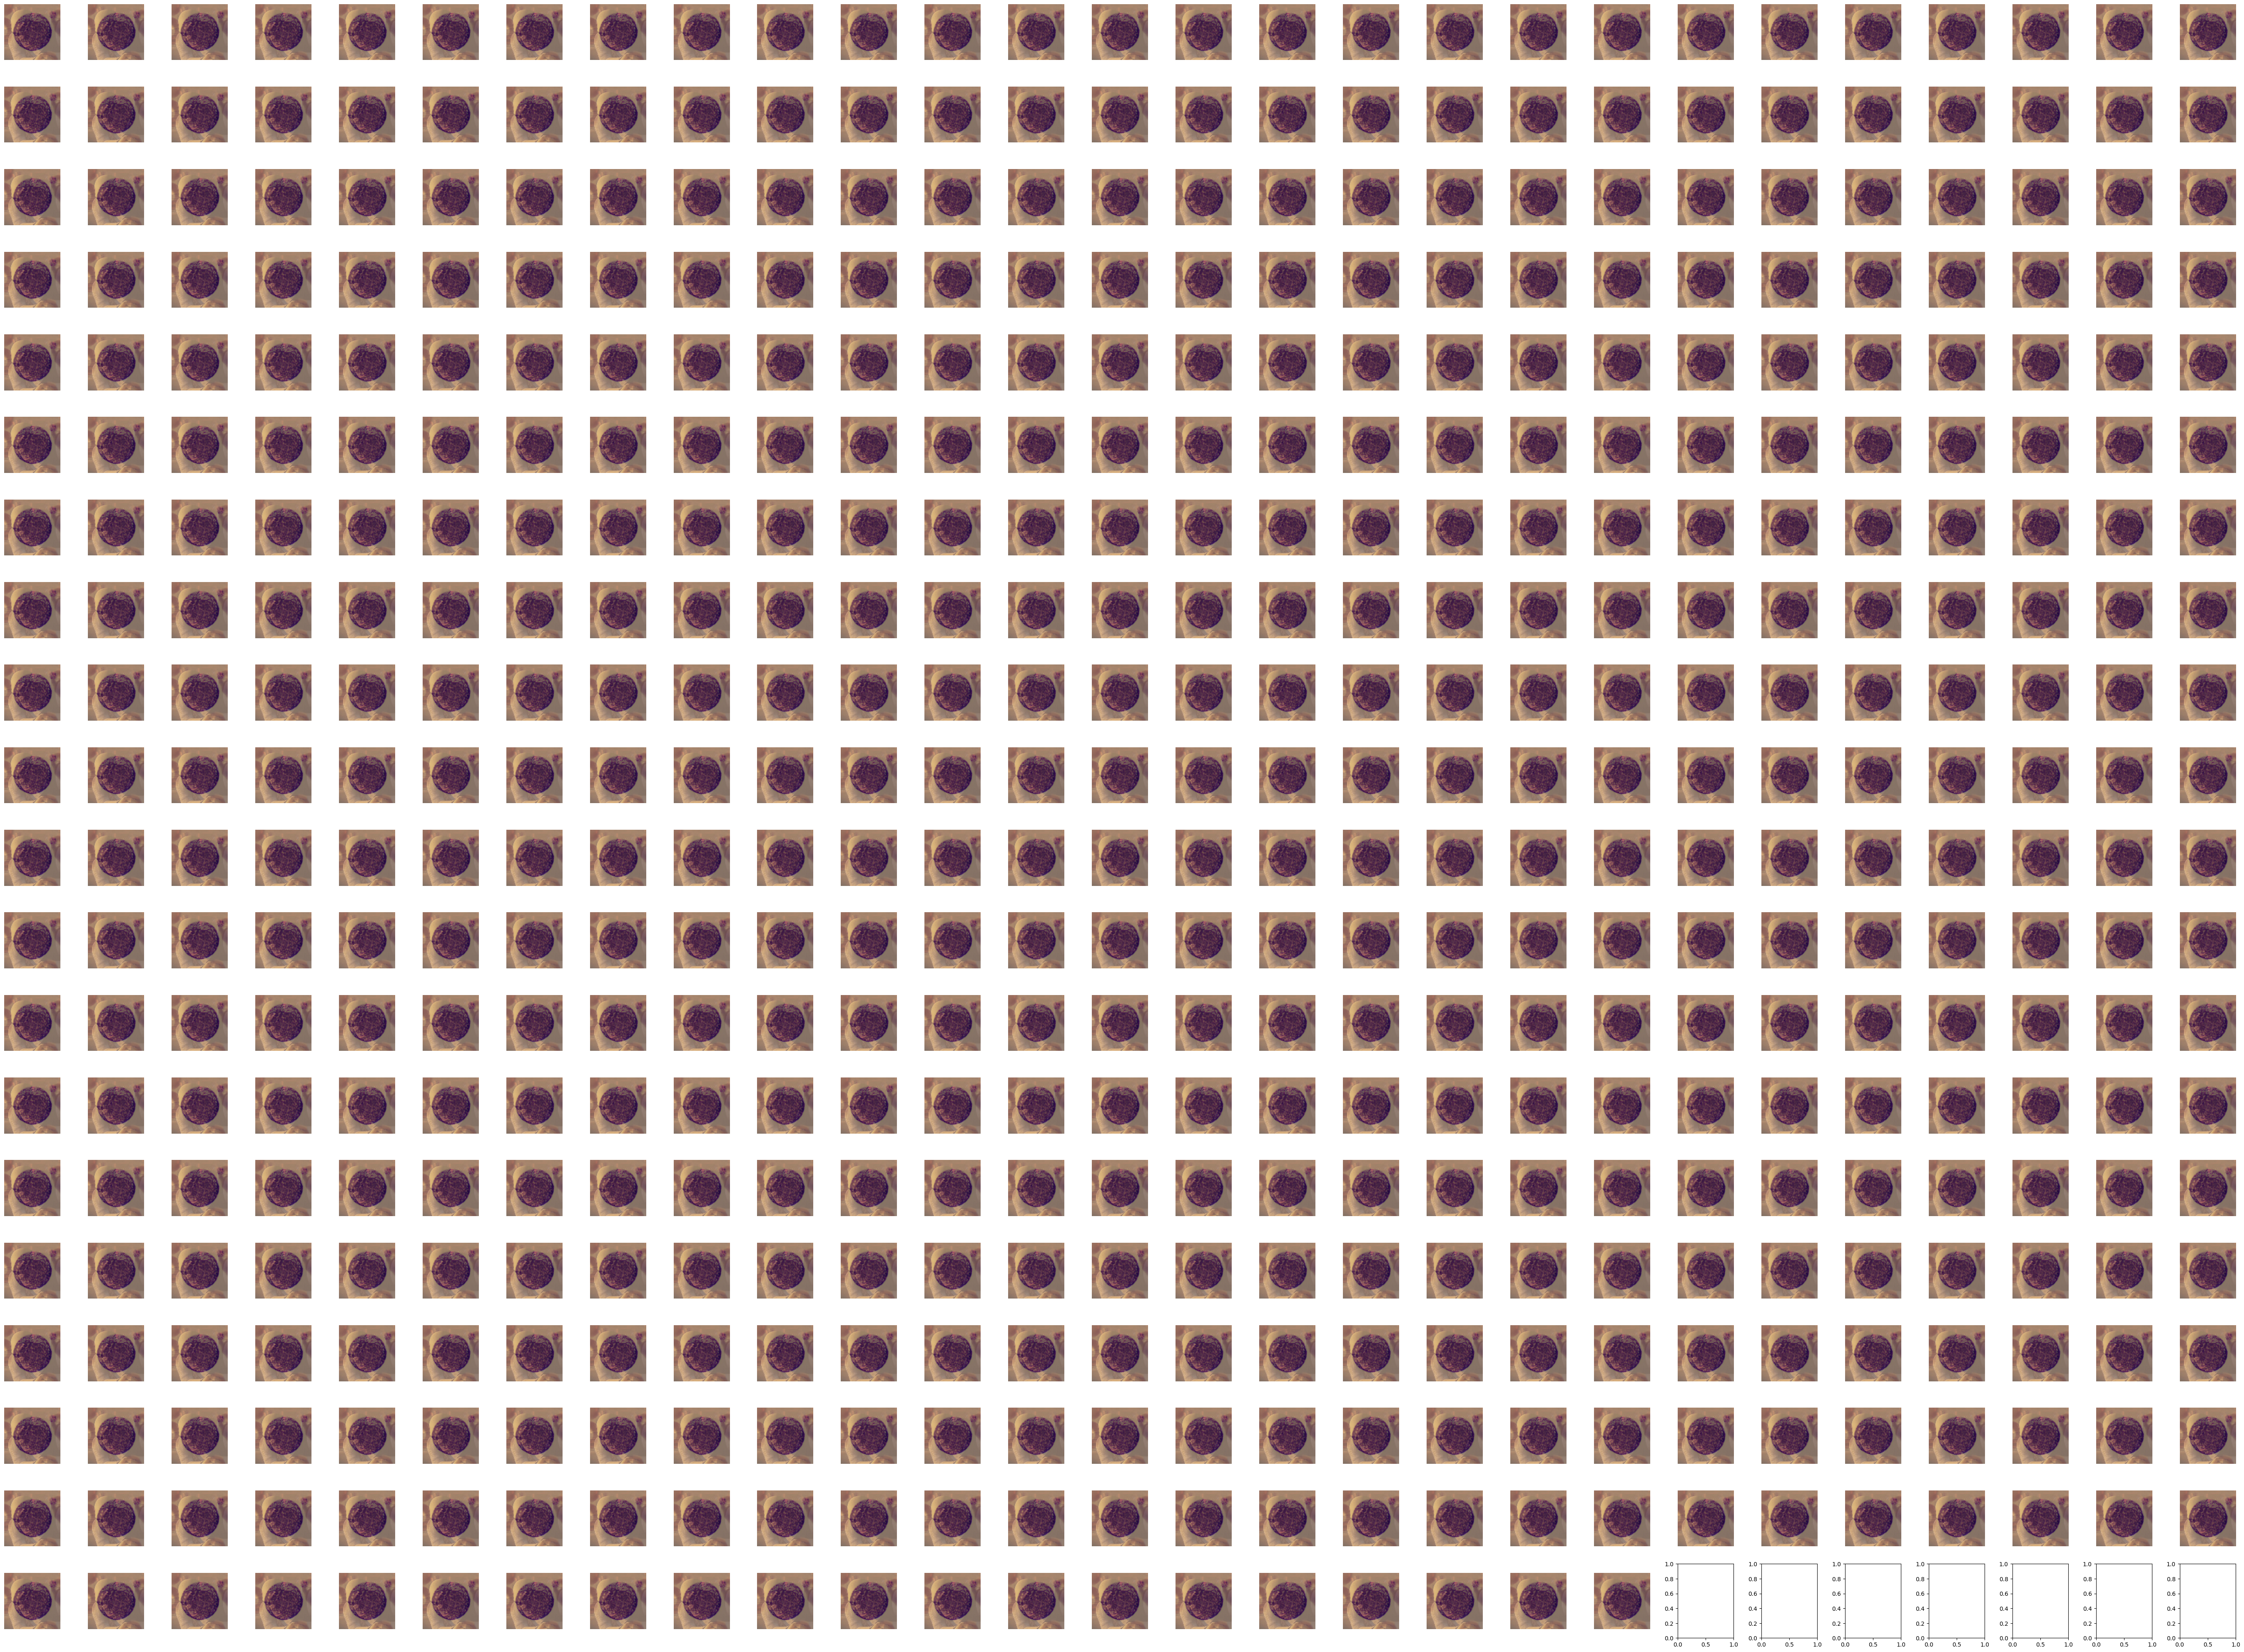

In [20]:
num = len(outlier_indices)//3
rows = 20
cols = num // rows + (num % rows > 0)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
indexes = random.sample(outlier_indices, num)
axes = axes.flatten()

for i, idx in enumerate(indexes):
    ax = axes[i]
    ax.imshow(np.squeeze(samples[idx]), vmin=0., vmax=255.)
    ax.axis('off')

plt.tight_layout()
plt.show()

Remove outliers

In [21]:
tot_count = len(samples)
outliers_count = len(outlier_indices)
samples = np.delete(samples, outlier_indices, axis=0)
labels = np.delete(labels, outlier_indices, axis=0)
print("Deleted " + str(outliers_count) + " records")

Deleted 1600 records


Inspect classes frequencies


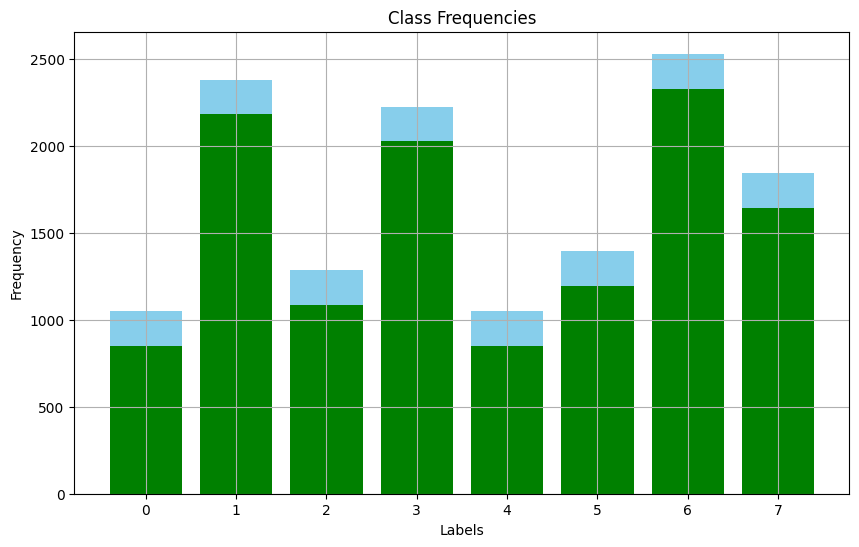

In [22]:
unique_labels, new_counts = np.unique(labels, return_counts=True)

plt.figure(figsize=(10, 6))
plt.bar(unique_labels, orig_counts, color='skyblue')
plt.bar(unique_labels, new_counts, color='green')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Class Frequencies')
plt.xticks(unique_labels)
plt.grid(True)
plt.show()